<a href="https://www.kaggle.com/code/viswashmishra/netflix-eda-using-plotly-seaborn-and-matplotlib?scriptVersionId=117015479" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Using different libraries for EDA on Netflix dataset.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from textblob import TextBlob 
import matplotlib.pyplot as plt
import missingno as msno
import plotly_express as px
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.shape

(8807, 12)

In [2]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Text(0.5, 0, '')

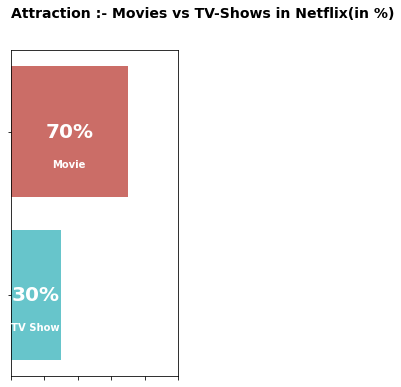

In [4]:
#Using Seaborn and Matplotlib to generate the types of content graph
types_df = df.groupby(["type"]).size().reset_index(name="counts")
types_df["percent"] = round(types_df["counts"] / sum(types_df["counts"]), 2) * 100
plt.figure(figsize=(3, 6))
g = sns.barplot(x="percent", y="type", palette="hls", data=types_df, orient="h")

g.text(
    0,
    -0.7,
    "Attraction :- Movies vs TV-Shows in Netflix(in %)",
    fontsize=14,
    fontweight="bold",
    color="black",
)

col = "percent"
for i in range(2):
    g.annotate(
        f"{int(types_df[col][i])}%",
        xy=(types_df[col][i] / 2, i),
        ha="center",
        va="center",
        fontsize=20,
        fontweight="bold",
        color="white",
    )
    g.annotate(
        "Movie" if i == 0 else "TV Show",
        xy=(types_df[col][i] / 2, i + 0.2),
        ha="center",
        va="center",
        fontsize=10,
        fontweight="bold",
        color="white",
    )
for i in ["top", "left", "right", "bottom"]:
    g.spines[i].set_visible(True)

g.set_xlim(0, 100)
g.set(xticklabels=[], yticklabels=[])
plt.ylabel("")
plt.xlabel("")

In [5]:
#Generating Same graph by using Plotly Express
z = df.groupby(['type']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='type',
title='Types of Content on Netflix')
pieChart.show()

In [6]:
z = df.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating',
title='Contents on Netflix by Age Group Ratings')
pieChart.show()

In [7]:
df['director']=df['director'].fillna('No Director Specified')
filtered_directors=pd.DataFrame()
filtered_directors=df['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Director Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head()
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')

fig1.show()

Text(0, 0.5, '')

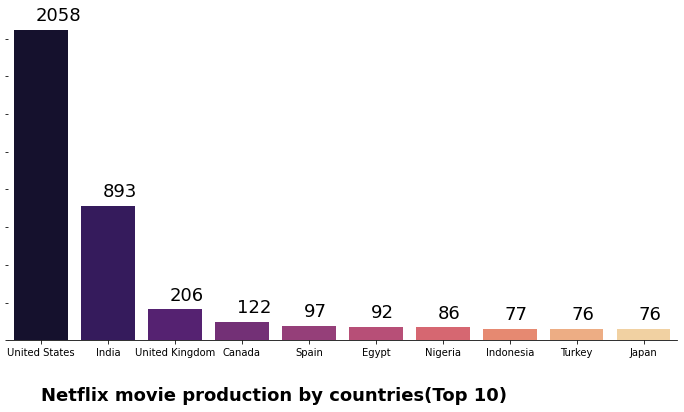

In [8]:
movies_df = df[df["type"] == "Movie"]
top5countries_movies = (
    movies_df.groupby(["country"]).size().sort_values(ascending=False)[0:10]
)

plt.figure(figsize=(12, 6))
g = sns.barplot(x=top5countries_movies.index, y=top5countries_movies, palette="magma")
g.text(
    0,
    -400,
    "Netflix movie production by countries(Top 10)",
    fontsize=18,
    fontweight="bold",
    color="black",
)

for i in ["top", "left", "right"]:
    g.spines[i].set_visible(False)

for i in g.patches:
    g.text(
        i.get_x() + i.get_width() / 2.5,
        i.get_height() + 60,
        round(i.get_height()),
        fontsize="18",
    )

g.set(yticklabels=[])
plt.xlabel("")
plt.ylabel("")

In [9]:
z = df.groupby(['release_year']).size().reset_index(name='counts')[0:30]
pieChart = px.pie(z, values='counts', names='release_year',
title='Contents on Netflix by Release Year')
pieChart.show()

In [10]:
#Using to_datetime and starftime to convert the date into likable format then representing it into a pie chart
df['Date'] = pd.to_datetime(df['date_added'])
df['Year'] = df['Date'].dt.strftime('%Y')
z = df.groupby(['Year']).size().reset_index(name='counts')[0:30]
pieChart = px.pie(z, values='counts', names='Year',
title='Contents on Netflix by Year Added')
pieChart.show()